In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
# 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
# 2 Задание.
# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
# Разделить данные на 2 группы
# Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [3]:
df_all = pd.read_csv('water.csv')[['location', 'town', 'mortality', 'hardness']]
df_north = df_all.loc[df_all['location'] == 'North']
df_south = df_all.loc[df_all['location'] == 'South']
display('-- All locations', df_all.head())
display('-- North locations', df_north.head())
display('-- South locations', df_south.head())

'-- All locations'

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


'-- North locations'

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


'-- South locations'

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


All locations:


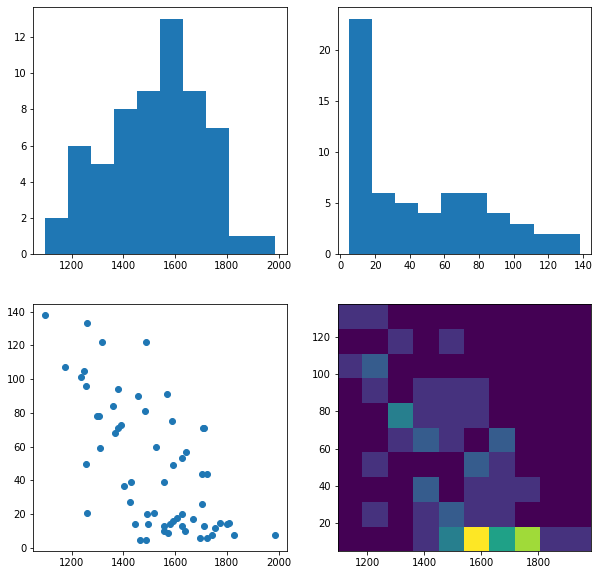

North locations


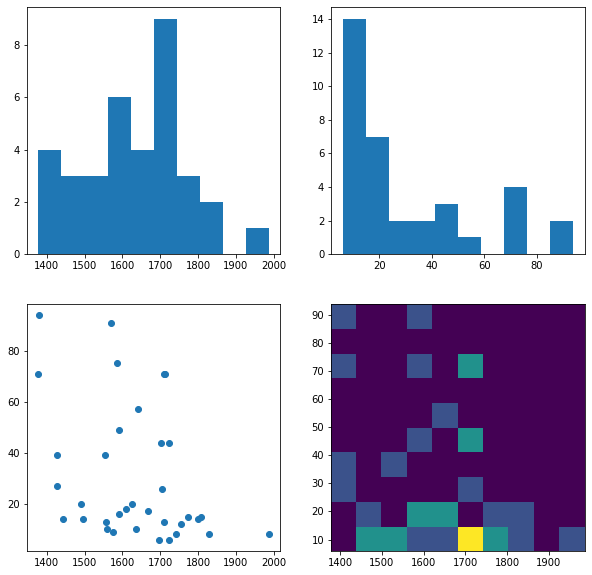

South locations


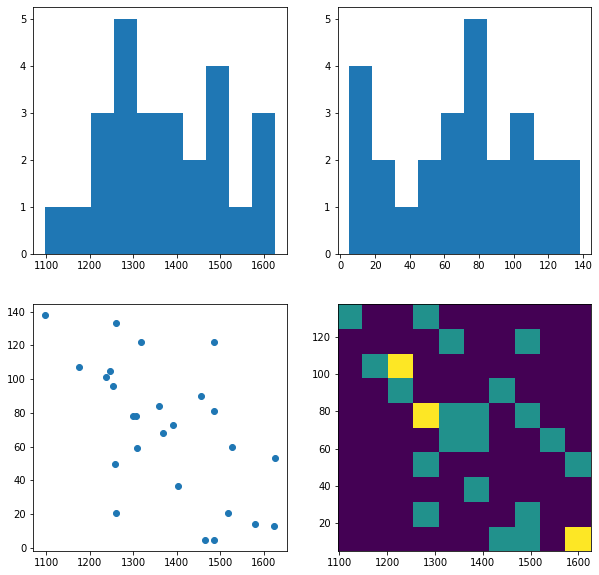

In [4]:
# Построить точечный график
def get_graph(X, Y):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].hist(X)
    axs[1, 0].scatter(X, Y)
    axs[0, 1].hist(Y)
    axs[1, 1].hist2d(X, Y)
    return plt.show()

print('All locations:')
get_graph(df_all['mortality'], df_all['hardness'])
print('North locations')
get_graph(df_north['mortality'], df_north['hardness'])
print('South locations')
get_graph(df_south['mortality'], df_south['hardness'])

In [5]:
# Рассчитать коэффициенты корреляции Пирсона и Спирмена
def get_corr_coef(df, X, Y, method_type):
    return display(method_type, df[[X, Y]].corr(method=method_type))

get_corr_coef(df_all, 'mortality', 'hardness', 'pearson')
get_corr_coef(df_all, 'mortality', 'hardness', 'spearman')
get_corr_coef(df_all, 'mortality', 'hardness', 'kendall')

'pearson'

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


'spearman'

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


'kendall'

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


0.4288267193124973

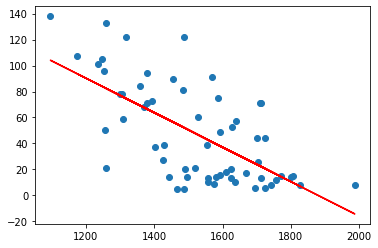

In [6]:
# Построить модель линейной регрессии
def get_liner_regression(df, X, Y):
    X_values = df[[X]].values
    Y_values = df[Y].values
    model = LinearRegression()
    model.fit(X_values, Y_values)
    display(model.score(X_values, Y_values))
    plt.scatter(df[X], df[Y])
    plt.plot(df[X], model.predict(df[[X]]), c='r')
    
get_liner_regression(df_all, 'mortality', 'hardness')

0.1358643664207171

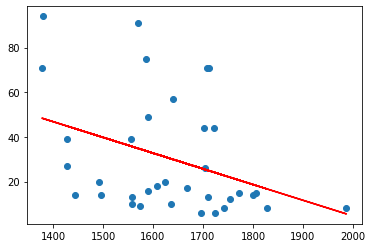

In [7]:
get_liner_regression(df_north, 'mortality', 'hardness')

0.3625885624364601

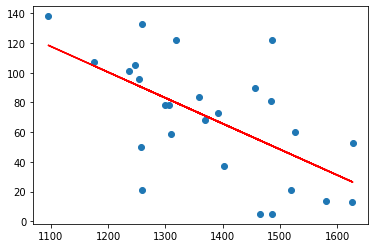

In [8]:
get_liner_regression(df_south, 'mortality', 'hardness')

All locations:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           1.03e-08
Time:                        22:22:55   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666     

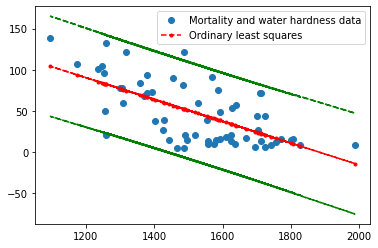


Residuals:


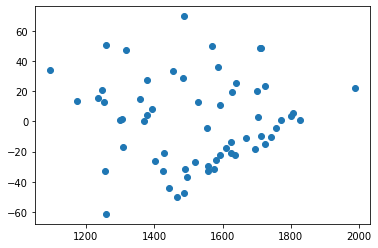

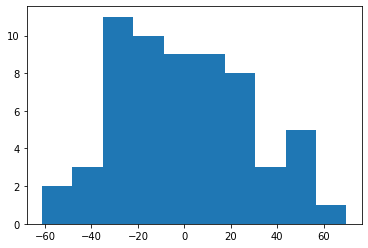

North locations
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Mon, 05 Oct 2020   Prob (F-statistic):             0.0293
Time:                        22:22:56   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623    

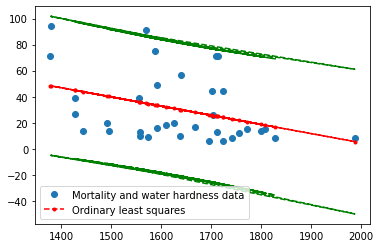


Residuals:


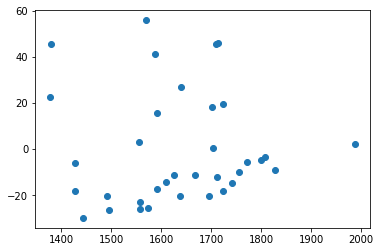

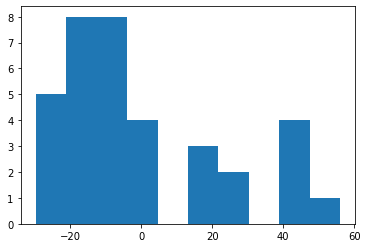

South locations
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Mon, 05 Oct 2020   Prob (F-statistic):            0.00113
Time:                        22:22:57   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883    

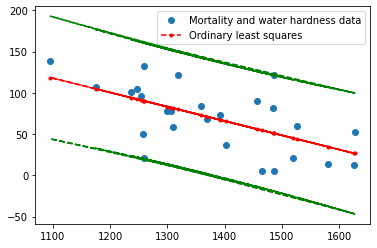


Residuals:


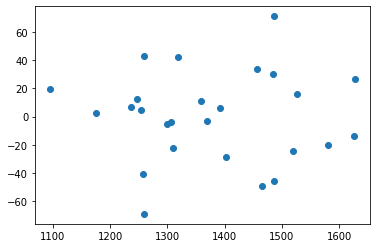

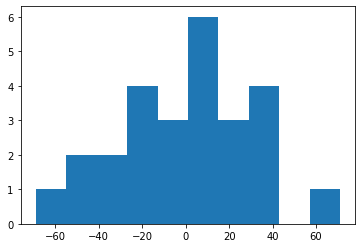

In [11]:
def get_stats_liner_regression(df, X, Y):
    X = sm.add_constant(df[[X]].values)
    Y = df[Y].values
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary())
    print('\nParameters: ', results.params)
    print('\nR2: ', results.rsquared)
    
    prstd, iv_l, iv_u = wls_prediction_std(results)
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(X[:,1], Y, 'o', label="Mortality and water hardness data")
    ax.plot(X[:,1], results.fittedvalues, 'r--.', label="Ordinary least squares")
    ax.plot(X[:,1], iv_u, 'g--')
    ax.plot(X[:,1], iv_l, 'g--')
    ax.legend(loc='best')
    
    print('\nOrdinary least squares:')
    plt.show()
    
    print('\nResiduals:')
    plt.scatter(X[:, 1], results.resid)
    plt.show()
    plt.hist(results.resid)
    plt.show()

print('All locations:')
get_stats_liner_regression(df_all, 'mortality', 'hardness')
print('North locations')
get_stats_liner_regression(df_north, 'mortality', 'hardness')
print('South locations')
get_stats_liner_regression(df_south, 'mortality', 'hardness')

In [10]:
# Есть ли связь между жёсткостью воды и средней годовой смертностью?
# Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
# Вывод:
#     1. Связь есть, чем жестче вода, тем меньше смертей.
#     2. Коэффициент детерминации 0.4, а также хаотчиынй уровень остатков указывает на то, что влияние есть (в общем).
#     3. Причем для северных районов эта связь слабее, но следует отметить, что визуально (на диаграмме рассеивания) прослеживается
#        легкий тренд.
# В целом, если рассматривать северный и южный районы отдельно, то статистика показывает, что есть другие более сильные факторы
# (особенно для северных районов), которые больше вляиютя на уровень сметрности, чем жесткость воды.